In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# imports cell
import sys 
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import _pickle as cPickle

# import tensorflow as tf
# import gc

In [3]:
# filepath = "/content/drive/My Drive/7th Term Assignments, Sheets & Labs/Modulation_classification/data/" # Yomna
filepath = "/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/data" # Arsany
# filepath = "/content/drive/MyDrive/Modulation_classification/data" # Kiro
os.chdir(filepath)

May help: https://github.com/LionAE/modulation-recognition-for-wireless-signals

2-
https://erichizdepski.wordpress.com/2019/05/23/using-machine-learning-to-categorize-radio-signals/


## **Download Data**

In [ ]:
# # you do not need to run this cell if you have an access to google drive.
# # download the dataset.
# !wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
# !tar -xf RML2016.10b.tar.bz2.1

--2020-12-31 01:59:38--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2.1’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  13.3MB/s    in 89s     

2020-12-31 02:01:08 (13.3 MB/s) - ‘RML2016.10b.tar.bz2.1’ saved [1245608913/1245608913]



# **Loading data**

In [4]:
with open('RML2016.10b.dat', 'rb') as f:
    Xd = cPickle.load(f, encoding="latin1") 
 
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    # mod is the label. mod = modulation scheme
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        #snr = signal to noise ratio
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

# **Create feature Spaces**

### 1. Raw time series as given (two channels)

In [5]:
X_raw = np.asarray(X)
X_raw = np.reshape(X_raw, (1200000,256))

print(X_raw.shape)

(1200000, 256)


### 2. First derivative in time (two channels)

In [ ]:
# X_deriv = []
# X_deriv = np.gradient(X_raw)
# X_deriv = np.asarray(X_deriv)
# print(X_deriv.shape)
# X_deriv = X_deriv[0]
# print(X_deriv.shape)

X_deriv = []
for x in X_raw:
  X_deriv.append(np.gradient(x))
X_deriv = np.asarray(X_deriv)
print(X_deriv.shape)
# X_deriv = X_deriv[0]
# print(X_deriv.shape)

(1200000, 256)


### 3. Integral in time (two channels)

In [ ]:
import scipy.integrate as it
# X_int = []
# X_int.append(it.cumtrapz(X_raw, initial=0))
# X_int = np.asarray(X_int)
# X_int = X_int[0]
# print(X_int.shape)

X_int = []
for x in X_raw:
  X_int.append(it.cumtrapz(x, initial=0))
X_int = np.asarray(X_int)
print(X_int.shape)
# X_int = X_int[0]
# print(X_int.shape)

(1200000, 256)


### 4. combinations of 1,2 and 3. (More channels)

In [ ]:
X_combined = []
for x, x_d, x_i in zip(X_raw, X_deriv, X_int):
  X_combined.append(np.concatenate((x, x_d, x_i), axis=0))
X_combined = np.asarray(X_combined)
print(X_combined.shape)

# **Supervised Learning Step**

### Spliting data

split data

In [ ]:
Y = np.array(lbl)
(trainX, testX, trainY, testY) = train_test_split(X,Y, test_size=0.3)
(trainX, valX, trainY, valY) = train_test_split(trainX,trainY, test_size=0.05)

In [ ]:
print("trainX.shape", trainX.shape)
print("testX.shape", testX.shape)
print("valX.shape", valX.shape)
print("trainy.shape", trainY.shape)
print("testy.shape", testY.shape)
print("valY.shape", valY.shape)

trainX.shape (798000, 2, 128)
testX.shape (360000, 2, 128)
valX.shape (42000, 2, 128)
trainy.shape (798000, 2)
testy.shape (360000, 2)
valY.shape (42000, 2)


split array of tuples into two arrays

In [ ]:
trainY_mods, trainY_snr = zip(*trainY)
testY_mods, testY_snr = zip(*testY)
valY_mods, valY_snr = zip(*valY)

trainY_mods = np.array(trainY_mods)
trainY_snr = np.array(trainY_snr)
testY_mods = np.array(testY_mods)
testY_snr = np.array(testY_snr)
valY_mods = np.array(valY_mods)
valY_snr = np.array(valY_snr)

In [ ]:
print(trainY_mods.shape)
print(trainY_snr.shape)

print(testY_mods.shape)
print(testY_snr.shape)

print(valY_mods.shape)
print(valY_snr.shape)

(798000,)
(798000,)
(360000,)
(360000,)
(42000,)
(42000,)


flatten the X train and test

In [ ]:
nsamples, nx, ny = trainX.shape
X_train = trainX.reshape((nsamples,nx*ny))

nsamples, nx, ny = testX.shape
X_test = testX.reshape((nsamples,nx*ny))

nsamples, nx, ny = valX.shape
X_val = valX.reshape((nsamples,nx*ny))

print(X_train.shape)

print(X_test.shape)

print(X_val.shape)

(798000, 256)
(360000, 256)
(42000, 256)


In [ ]:
# # Partition the data
# #  into training and test sets of the form we can train/test on
# #  while keeping SNR and Mod labels handy for each
# # np.random.seed(2016)
# n_examples = X.shape[0]
# # print("ْx.shape", X.shape)
# n_tandv = int(n_examples * 0.7)
# # print("n_tandv", n_tandv)
# tandv_idx = np.random.choice(range(0,n_examples), size=n_tandv, replace=False)
# # print("tandv_idx.shape", tandv_idx.shape)
# test_idx = list(set(range(0,n_examples))-set(tandv_idx))
# # print("test_idx.shape", len(test_idx))
# X_p1 = X[tandv_idx]
# # print("X_p1.shape", X_p1.shape)
# X_test =  X[test_idx]
# # print("X_test.shape", X_test.shape)
# n_train = int(X_p1.shape[0] * 0.95)
# # print("n_train", n_train)
# n_examples = X_p1.shape[0]
# # print("n_examples", n_examples)
# train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
# # print("=======================================================================")
# # print("train_idx.shape", train_idx.shape)
# val_idx = list(set(range(0,n_examples))-set(train_idx))
# # print("val_idx.shape", len(val_idx))
# X_train = X_p1[train_idx]
# # print("X_train.shape", X_train.shape)
# X_val =  X_p1[val_idx]
# # print("X_val.shape", X_val.shape)

# def to_onehot(yy):
#   data = list(yy)
#   yy1 = np.zeros([len(data), max(data)+1])
#   yy1[np.arange(len(data)),data] = 1
#   return yy1

# Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
# Y_val = to_onehot(map(lambda x: mods.index(lbl[x][0]), val_idx))
# Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))
# print(X_train.shape,Y_train.shape)
# print(X_val.shape,Y_val.shape)
# print(X_test.shape,Y_test.shape)

In [ ]:
# Partition the data
#  into training and test sets of the form we can train/test on
#  while keeping SNR and Mod labels handy for each
n_examples = X.shape[0]
# looks like taking half the samples for training
n_train = int(n_examples * 0.7)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]

def to_onehot(yy):
    data = list(yy)
    yy1 = np.zeros([len(data), max(data)+1])
    yy1[np.arange(len(data)),data] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size=0.05)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

(798000, 2, 128) (798000, 10)
(42000, 2, 128) (42000, 10)
(360000, 2, 128) (360000, 10)


### Classifiers

In [ ]:
# passed parameters
# X_train - X_test - X_val

# trainY_mods - trainY_snr

# testY_mods - testY_snr

# valY_mods - valY_snr

Logistic Regression Classifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

logistic_regression = LogisticRegression(max_iter=1000)
scaler = MinMaxScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)
normalized_X_val = scaler.transform(X_val)
logistic_regression_model = logistic_regression.fit(normalized_X_train, trainY_mods)

In [ ]:
import pickle
pickle.dump(logistic_regression_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/logistic_regression.sav', 'wb'))

# loaded_model = pickle.load(open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/logistic_regression.sav', 'rb'))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

SNR =  -20

Accuracy =  0.10256979519342843
Train Accuracy =  0.11099400235890487
Validation Accuracy =  0.09044048734770384
SNR =  -18

Accuracy =  0.10448010698762955
Train Accuracy =  0.11239164203036528
Validation Accuracy =  0.08644859813084112
SNR =  -16

Accuracy =  0.10377305913169481
Train Accuracy =  0.1156496554479177
Validation Accuracy =  0.10773067331670823
SNR =  -14

Accuracy =  0.10491382676111329
Train Accuracy =  0.11780465209444403
Validation Accuracy =  0.09896810506566604
SNR =  -12

Accuracy =  0.11477499445799158
Train Accuracy =  0.12919273385090826
Validation Accuracy =  0.10951276102088167
SNR =  -10

Accuracy =  0.14311967477863785
Train Accuracy =  0.1559120945134161
Validation Accuracy =  0.09995217599234815
SNR =  -8

Accuracy =  0.17631739347259934
Train Accuracy =  0.18679996993159437
Validation Accuracy =  0.09784735812133072
SNR =  -6

Accuracy =  0.18837863167760074
Train Accuracy =  0.19243925750792293
Validation Accuracy =  0.10175939134569663
SNR 

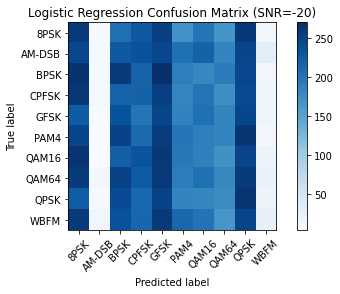

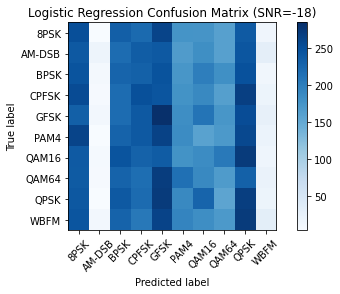

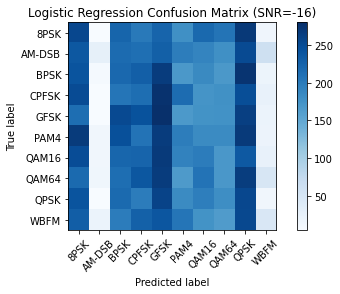

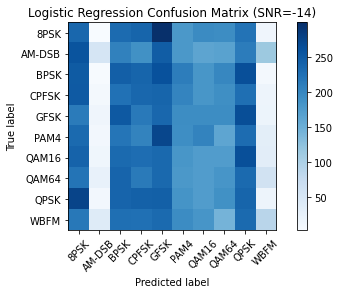

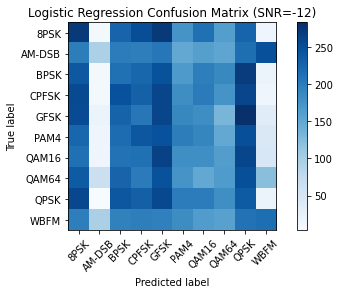

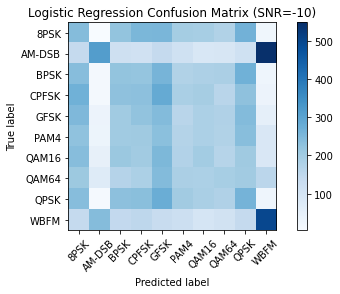

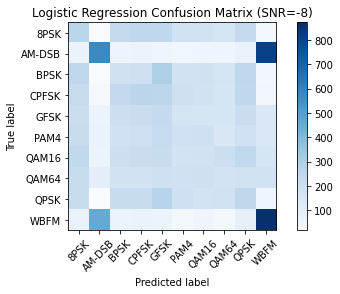

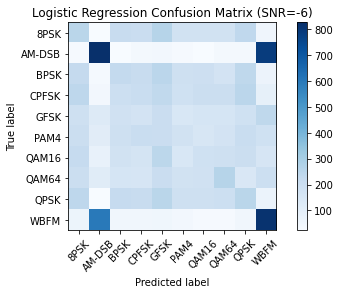

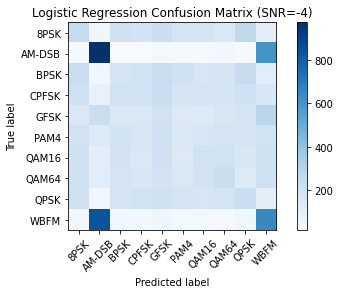

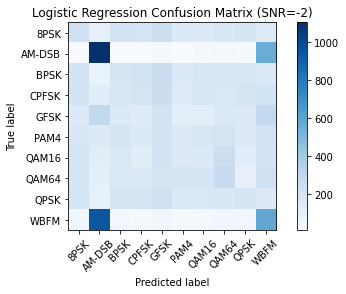

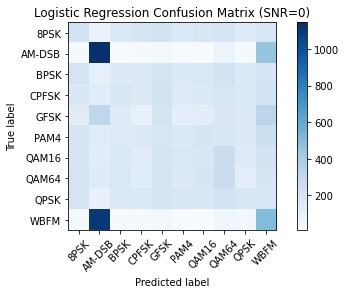

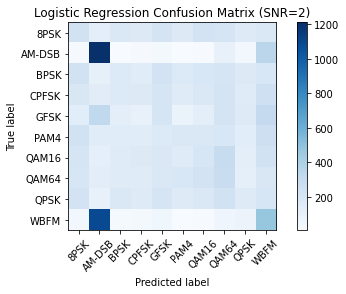

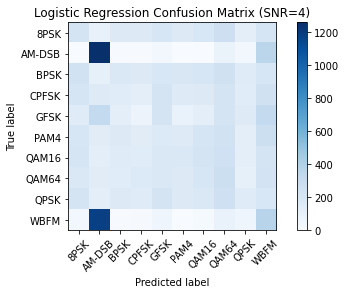

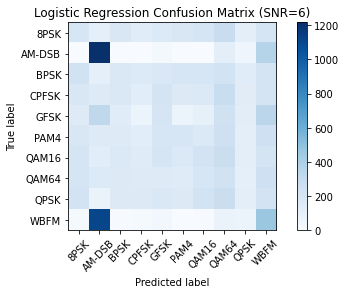

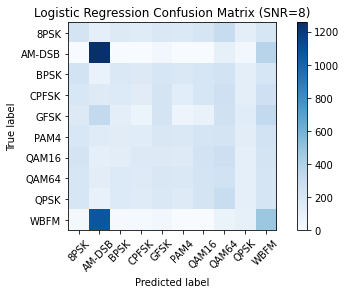

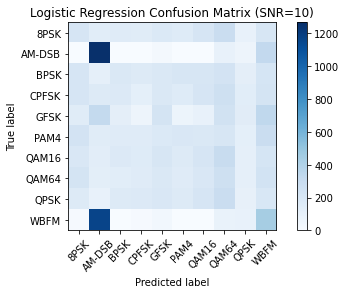

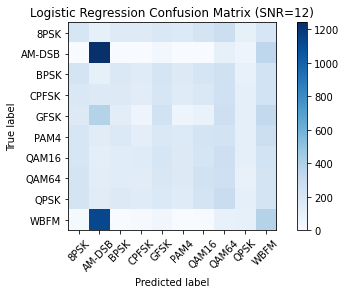

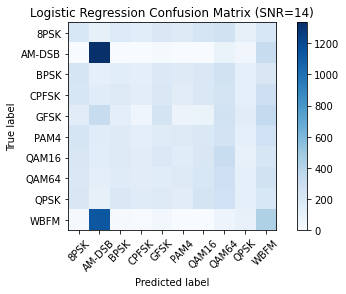

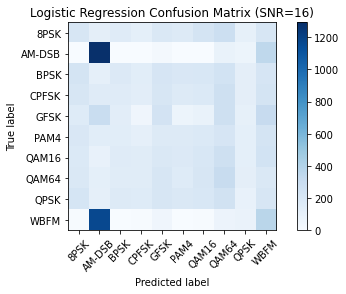

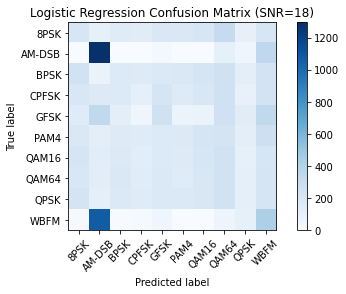

In [ ]:
acc = []
tr_acc = []
val_acc = []
for snr in snrs:
  print("SNR = ", snr)
  #test accuracy
  normalized_X_test_i = normalized_X_test[np.where(testY_snr == str(snr))]
  testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

  y_pred = logistic_regression_model.predict(normalized_X_test_i)
  accuracy = accuracy_score(y_pred, testY_mods_i)
  acc.append(accuracy)
  print("\nAccuracy = ", accuracy)

  #train accuracy
  normalized_X_train_i = normalized_X_train[np.where(trainY_snr == str(snr))]
  trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

  y_pred_train = logistic_regression_model.predict(normalized_X_train_i)
  train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
  tr_acc.append(train_accuracy)
  print("Train Accuracy = ", train_accuracy)

  #validation accuracy
  X_val_i = X_val[np.where(valY_snr == str(snr))]
  valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

  y_pred_val = logistic_regression_model.predict(X_val_i)
  val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
  val_acc.append(val_accuracy)
  print("Validation Accuracy = ", val_accuracy)

  conf = confusion_matrix(testY_mods_i, y_pred)
  plt.figure()
  plot_confusion_matrix(conf, labels=mods, title="Logistic Regression Confusion Matrix (SNR=%d)"%(snr))

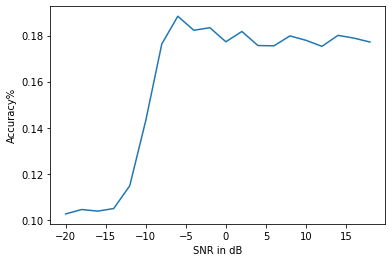

In [ ]:
# Plot the data
plt.plot(snrs, acc)
plt.xlabel('SNR in dB')
plt.ylabel('Accuracy%')
# Show the plot
plt.show()

Decision ​ Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

decision_tree = DecisionTreeClassifier()
# scaler = MinMaxScaler()
# normalized_X_train = scaler.fit_transform(X_train)
# normalized_X_test = scaler.transform(X_test)
# normalized_X_val = scaler.transform(X_val)
decision_tree_model = decision_tree.fit(X_train, trainY_mods)

In [ ]:
import pickle
pickle.dump(decision_tree_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/decision_tree.sav', 'wb'))

# loaded_model = pickle.load(open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/decision_tree.sav', 'rb'))

SNR =  -20

Accuracy =  0.10029758624490245
Train Accuracy =  1.0
Validation Accuracy =  0.10503597122302158
SNR =  -18

Accuracy =  0.102695193109197
Train Accuracy =  1.0
Validation Accuracy =  0.09561200923787529
SNR =  -16

Accuracy =  0.10010410388471865
Train Accuracy =  1.0
Validation Accuracy =  0.09962049335863378
SNR =  -14

Accuracy =  0.1022658024486178
Train Accuracy =  1.0
Validation Accuracy =  0.10286519492719587
SNR =  -12

Accuracy =  0.10619615639496355
Train Accuracy =  1.0
Validation Accuracy =  0.0976926853215513
SNR =  -10

Accuracy =  0.11372374212960383
Train Accuracy =  1.0
Validation Accuracy =  0.12398276687410244
SNR =  -8

Accuracy =  0.12756276724043417
Train Accuracy =  1.0
Validation Accuracy =  0.11342069588793494
SNR =  -6

Accuracy =  0.14405829596412556
Train Accuracy =  1.0
Validation Accuracy =  0.15009293680297398
SNR =  -4

Accuracy =  0.18362533692722371
Train Accuracy =  1.0
Validation Accuracy =  0.18034398034398033
SNR =  -2

Accuracy =  0.2

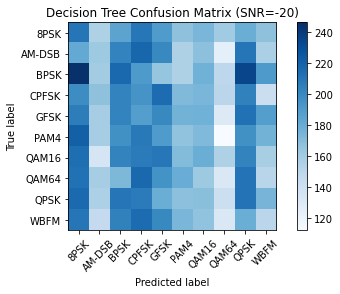

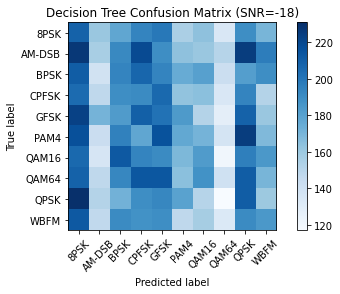

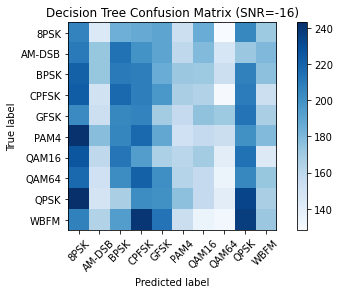

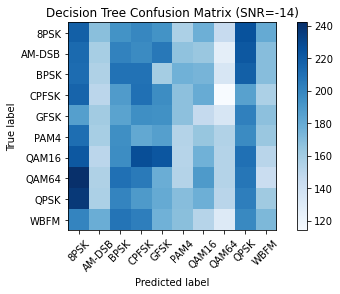

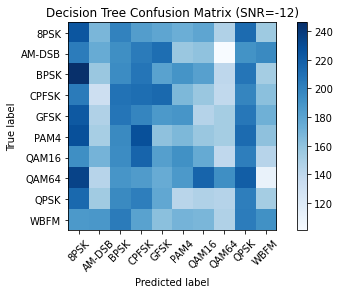

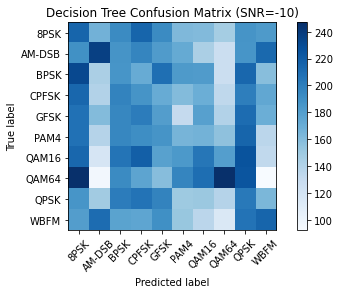

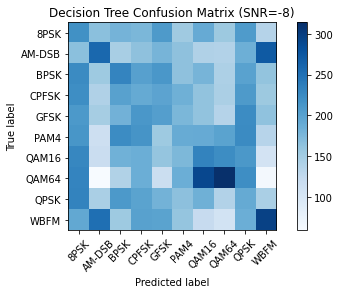

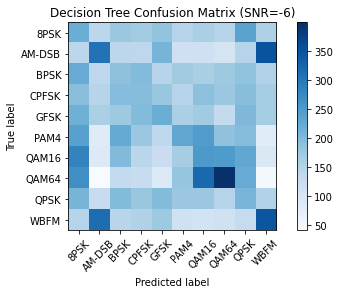

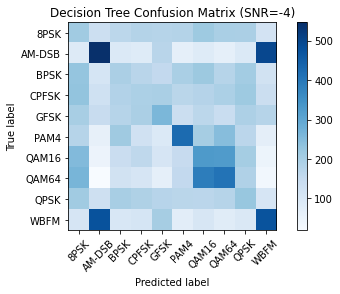

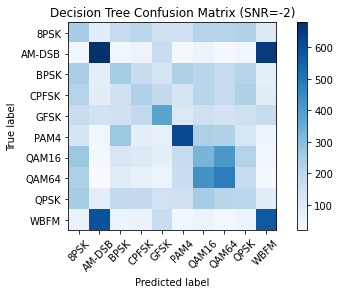

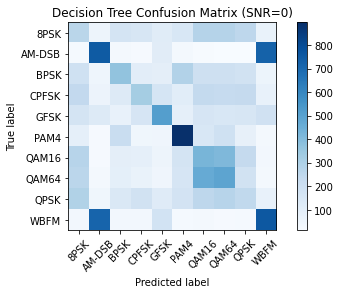

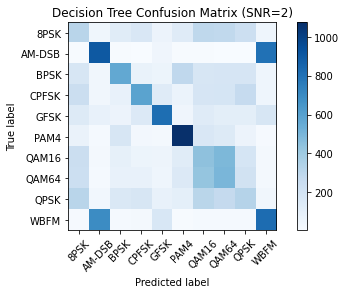

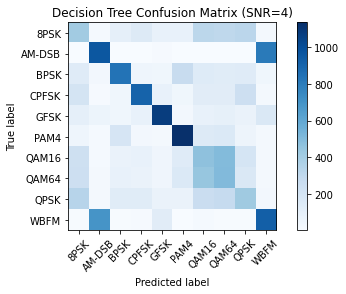

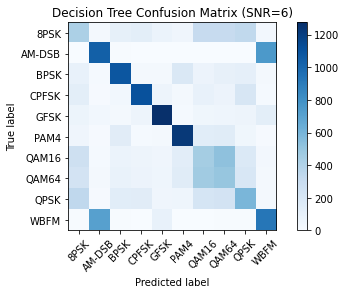

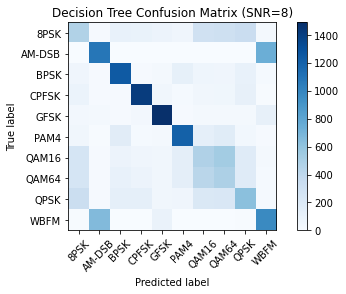

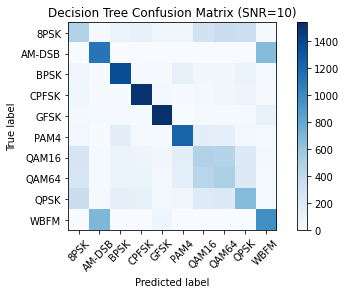

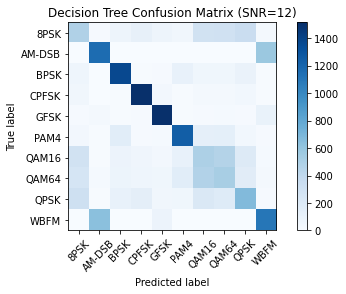

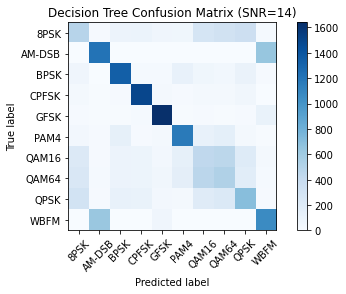

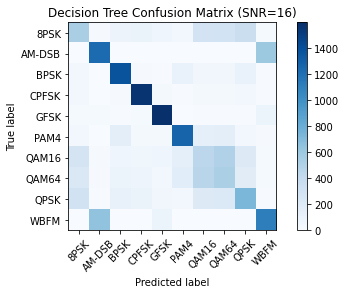

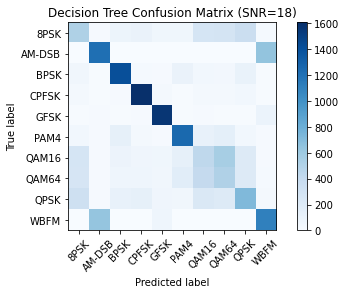

In [ ]:
acc = []
tr_acc = []
val_acc = []
for snr in snrs:
  print("SNR = ", snr)
  #test accuracy
  X_test_i = X_test[np.where(testY_snr == str(snr))]
  testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

  y_pred = decision_tree_model.predict(X_test_i)
  accuracy = accuracy_score(y_pred, testY_mods_i)
  acc.append(accuracy)
  print("\nAccuracy = ", accuracy)

  #train accuracy
  X_train_i = X_train[np.where(trainY_snr == str(snr))]
  trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

  y_pred_train = decision_tree_model.predict(X_train_i)
  train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
  tr_acc.append(train_accuracy)
  print("Train Accuracy = ", train_accuracy)

  #validation accuracy
  X_val_i = X_val[np.where(valY_snr == str(snr))]
  valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

  y_pred_val = decision_tree_model.predict(X_val_i)
  val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
  val_acc.append(val_accuracy)
  print("Validation Accuracy = ", val_accuracy)

  conf = confusion_matrix(testY_mods_i, y_pred)
  plt.figure()
  plot_confusion_matrix(conf, labels=mods, title="Decision Tree Confusion Matrix (SNR=%d)"%(snr))

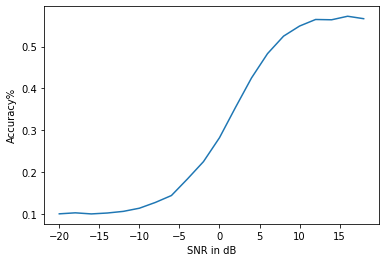

In [ ]:
# Plot the data
plt.plot(snrs, acc)
plt.xlabel('SNR in dB')
plt.ylabel('Accuracy%')
# Show the plot
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 50, n_jobs=1)
random_forest_model = random_forest.fit(X_train, trainY_mods)

In [ ]:
import pickle
pickle.dump(random_forest_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/random_forest.sav', 'wb'))

# random_forest_model = pickle.load(open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/random_forest.sav', 'rb'))

SNR =  -20

Accuracy =  0.09869943789264851
Train Accuracy =  1.0
Validation Accuracy =  0.10119904076738609
SNR =  -18

Accuracy =  0.10486246179494305
Train Accuracy =  1.0
Validation Accuracy =  0.09792147806004618
SNR =  -16

Accuracy =  0.10448742534655635
Train Accuracy =  1.0
Validation Accuracy =  0.1062618595825427
SNR =  -14

Accuracy =  0.11079718575148191
Train Accuracy =  1.0
Validation Accuracy =  0.09581963363081258
SNR =  -12

Accuracy =  0.11735144687430969
Train Accuracy =  1.0
Validation Accuracy =  0.11929307805596466
SNR =  -10

Accuracy =  0.13801749596032764
Train Accuracy =  1.0
Validation Accuracy =  0.13882240306366683
SNR =  -8

Accuracy =  0.18084639842122574
Train Accuracy =  1.0
Validation Accuracy =  0.17306823316764572
SNR =  -6

Accuracy =  0.24915919282511212
Train Accuracy =  1.0
Validation Accuracy =  0.2537174721189591
SNR =  -4

Accuracy =  0.31446540880503143
Train Accuracy =  1.0
Validation Accuracy =  0.31105651105651105
SNR =  -2

Accuracy =  0

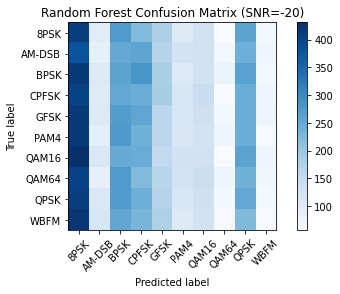

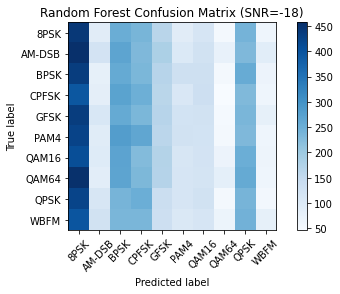

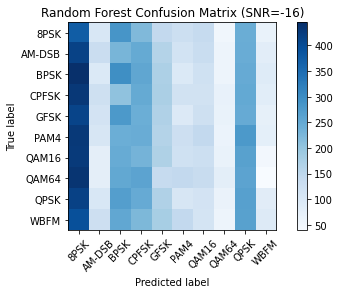

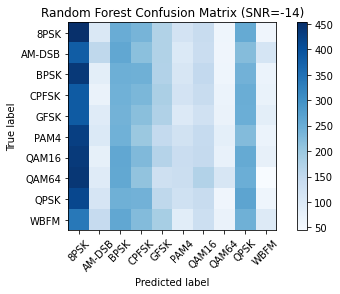

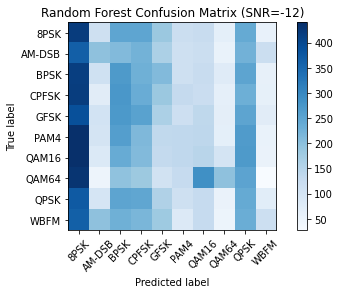

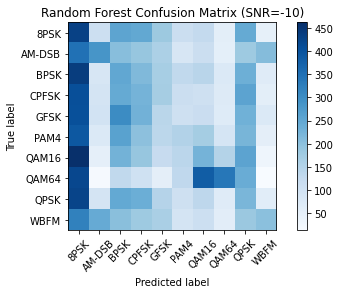

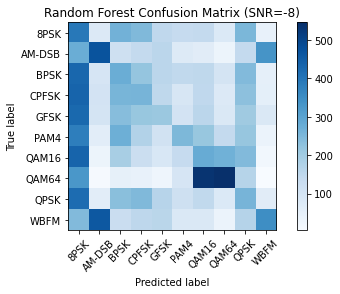

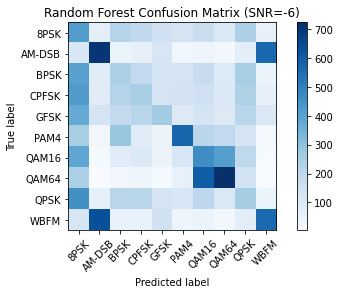

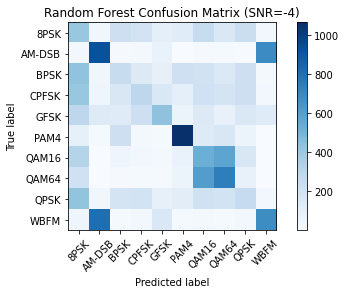

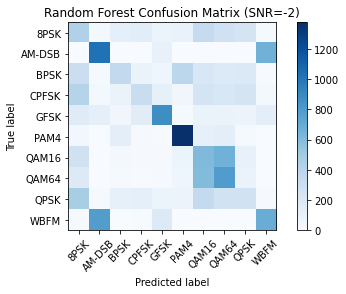

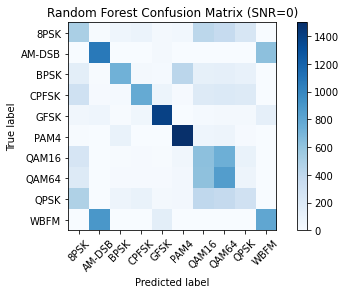

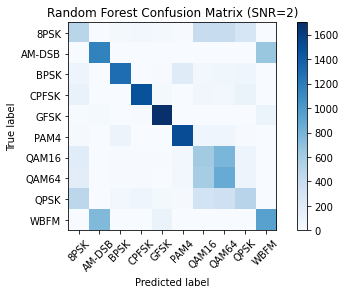

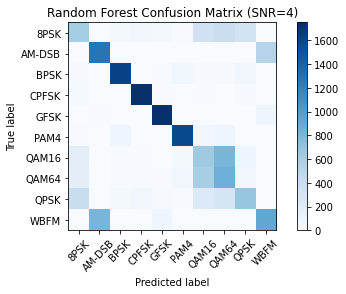

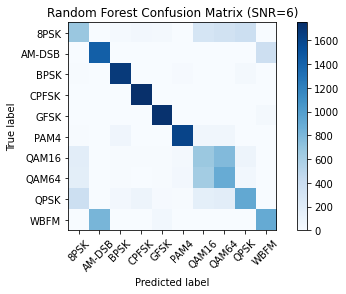

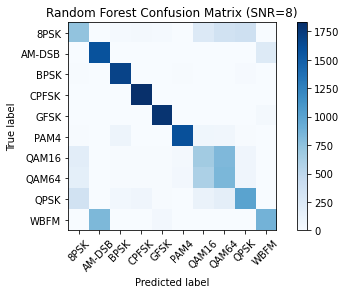

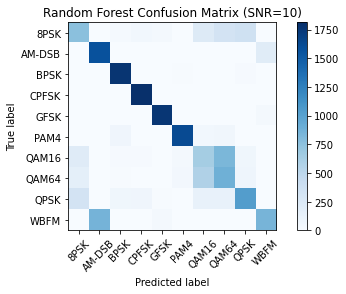

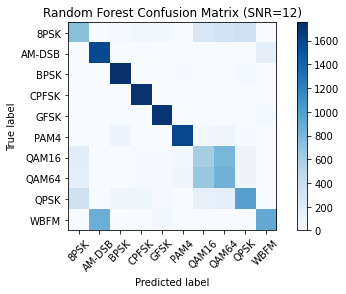

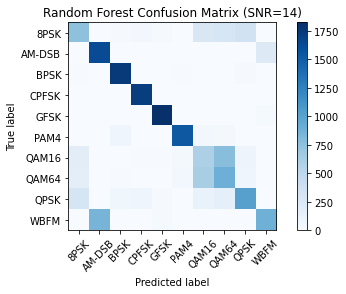

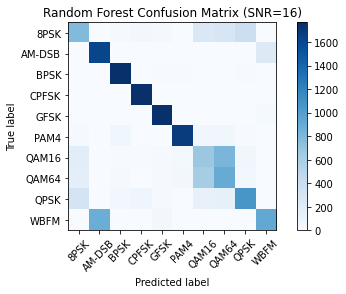

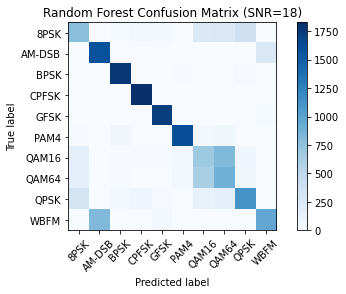

In [ ]:
acc = []
tr_acc = []
val_acc = []
for snr in snrs:
  print("SNR = ", snr)
  #test accuracy
  X_test_i = X_test[np.where(testY_snr == str(snr))]
  testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

  y_pred = random_forest_model.predict(X_test_i)
  accuracy = accuracy_score(y_pred, testY_mods_i)
  acc.append(accuracy)
  print("\nAccuracy = ", accuracy)

  #train accuracy
  X_train_i = X_train[np.where(trainY_snr == str(snr))]
  trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

  y_pred_train = random_forest_model.predict(X_train_i)
  train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
  tr_acc.append(train_accuracy)
  print("Train Accuracy = ", train_accuracy)

  #validation accuracy
  X_val_i = X_val[np.where(valY_snr == str(snr))]
  valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

  y_pred_val = random_forest_model.predict(X_val_i)
  val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
  val_acc.append(val_accuracy)
  print("Validation Accuracy = ", val_accuracy)

  conf = confusion_matrix(testY_mods_i, y_pred)
  plt.figure()
  plot_confusion_matrix(conf, labels=mods, title="Random Forest Confusion Matrix (SNR=%d)"%(snr))

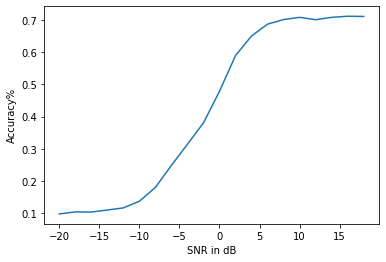

In [ ]:
# Plot the data
plt.plot(snrs, acc)
plt.xlabel('SNR in dB')
plt.ylabel('Accuracy%')
# Show the plot
plt.show()

In [ ]:
Y = np.array(lbl)
(trainX, testX, trainY, testY) = train_test_split(X,Y, test_size=0.3)
lb=LabelBinarizer()
lb.fit_transform(trainY[:,0])
(trainX, valX, trainY, valY) = train_test_split(trainX,trainY, test_size=0.05)
lb.fit_transform(trainY[:,0])
lb.transform(testY[:,0])
lb.transform(valY[:,0])
print()

In [ ]:
print("trainX.shape", trainX.shape)
print("testX.shape", testX.shape)
print("valX.shape", valX.shape)
print("trainy.shape", trainY.shape)
print("testy.shape", testY.shape)
print("valy.shape", valY.shape)

trainX.shape (798000, 2, 128)
testX.shape (360000, 2, 128)
valX.shape (42000, 2, 128)
trainy.shape (798000, 2)
testy.shape (360000, 2)
valy.shape (42000, 2)


# **Functions of Classifiers**

**Splitting Data**

In [6]:
def split_data(X, lbl):
  Y = np.array(lbl)
  (trainX, testX, trainY, testY) = train_test_split(X,Y, test_size=0.3)
  (trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.05)

  trainY_mods, trainY_snr = zip(*trainY)
  testY_mods, testY_snr = zip(*testY)
  valY_mods, valY_snr = zip(*valY)

  trainY_mods = np.array(trainY_mods)
  trainY_snr = np.array(trainY_snr)
  testY_mods = np.array(testY_mods)
  testY_snr = np.array(testY_snr)
  valY_mods = np.array(valY_mods)
  valY_snr = np.array(valY_snr)

  return trainX, testX, valX, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr

**Flatten Data**

In [7]:
def flatten(trainX, testX, valX):
  
  nsamples, nx, ny = trainX.shape
  X_train = trainX.reshape((nsamples,nx*ny))

  nsamples, nx, ny = testX.shape
  X_test = testX.reshape((nsamples,nx*ny))

  nsamples, nx, ny = valX.shape
  X_val = valX.reshape((nsamples,nx*ny))

  return X_train, X_test, X_val


**Confusion Matrix plotting**

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

**SNRs Plotting**

In [ ]:
def snr_plot(acc, snrs):
  # Plot the data
  plt.plot(snrs, acc)
  plt.xlabel('SNR in dB')
  plt.ylabel('Accuracy%')
  # Show the plot
  plt.show()

**Logistic Regression**

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

def log_reg_classifier(snrs, X_train, X_test, X_val, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr):  
  
  #logistic regression classifier
  logistic_regression = LogisticRegression(max_iter=1000)
  scaler = MinMaxScaler()
  normalized_X_train = scaler.fit_transform(X_train)
  normalized_X_test = scaler.transform(X_test)
  normalized_X_val = scaler.transform(X_val)
  logistic_regression_model = logistic_regression.fit(normalized_X_train, trainY_mods)

  #save model
  # pickle.dump(logistic_regression_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/logistic_regression(feature_typexxxx).sav', 'wb'))

  #calculating accuracies
  acc = []
  tr_acc = []
  val_acc = []
  for snr in snrs:
    print("SNR = ", snr)
    #test accuracy
    normalized_X_test_i = normalized_X_test[np.where(testY_snr == str(snr))]
    testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

    y_pred = logistic_regression_model.predict(normalized_X_test_i)
    accuracy = accuracy_score(y_pred, testY_mods_i)
    acc.append(accuracy)
    print("\nAccuracy = ", accuracy)

    #train accuracy
    normalized_X_train_i = normalized_X_train[np.where(trainY_snr == str(snr))]
    trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

    y_pred_train = logistic_regression_model.predict(normalized_X_train_i)
    train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
    tr_acc.append(train_accuracy)
    print("Train Accuracy = ", train_accuracy)

    #validation accuracy
    X_val_i = X_val[np.where(valY_snr == str(snr))]
    valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

    y_pred_val = logistic_regression_model.predict(X_val_i)
    val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
    val_acc.append(val_accuracy)
    print("Validation Accuracy = ", val_accuracy)

    conf = confusion_matrix(testY_mods_i, y_pred)
    plt.figure()
    plot_confusion_matrix(conf, labels=mods, title="Logistic Regression Confusion Matrix (SNR=%d)"%(snr))
  
  return acc

**Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

def decision_tree_classifier(snrs, trainX, testX, valX, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr):

  #Decision Tree classifier
  decision_tree = DecisionTreeClassifier()
  decision_tree_model = decision_tree.fit(X_train, trainY_mods)

  #save model
  # pickle.dump(decision_tree_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/decision_tree(feature_typexxxx).sav', 'wb'))

  acc = []
  tr_acc = []
  val_acc = []
  for snr in snrs:
    print("SNR = ", snr)
    #test accuracy
    X_test_i = X_test[np.where(testY_snr == str(snr))]
    testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

    y_pred = decision_tree_model.predict(X_test_i)
    accuracy = accuracy_score(y_pred, testY_mods_i)
    acc.append(accuracy)
    print("\nAccuracy = ", accuracy)

    #train accuracy
    X_train_i = X_train[np.where(trainY_snr == str(snr))]
    trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

    y_pred_train = decision_tree_model.predict(X_train_i)
    train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
    tr_acc.append(train_accuracy)
    print("Train Accuracy = ", train_accuracy)

    #validation accuracy
    X_val_i = X_val[np.where(valY_snr == str(snr))]
    valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

    y_pred_val = decision_tree_model.predict(X_val_i)
    val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
    val_acc.append(val_accuracy)
    print("Validation Accuracy = ", val_accuracy)

    conf = confusion_matrix(testY_mods_i, y_pred)
    plt.figure()
    plot_confusion_matrix(conf, labels=mods, title="Decision Tree Confusion Matrix (SNR=%d)"%(snr))

  return acc

**Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

def random_forest_classifier(snrs, trainX, testX, valX, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr):

  #random forest classifier
  random_forest = RandomForestClassifier(n_estimators = 50, n_jobs=1)
  random_forest_model = random_forest.fit(X_train, trainY_mods)

  #save model
  # pickle.dump(decision_tree_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/random_forest(feature_typexxxx).sav', 'wb'))

  acc = []
  tr_acc = []
  val_acc = []
  for snr in snrs:
    print("SNR = ", snr)
    #test accuracy
    X_test_i = X_test[np.where(testY_snr == str(snr))]
    testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

    y_pred = random_forest_model.predict(X_test_i)
    accuracy = accuracy_score(y_pred, testY_mods_i)
    acc.append(accuracy)
    print("\nAccuracy = ", accuracy)

    #train accuracy
    X_train_i = X_train[np.where(trainY_snr == str(snr))]
    trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

    y_pred_train = random_forest_model.predict(X_train_i)
    train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
    tr_acc.append(train_accuracy)
    print("Train Accuracy = ", train_accuracy)

    #validation accuracy
    X_val_i = X_val[np.where(valY_snr == str(snr))]
    valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

    y_pred_val = random_forest_model.predict(X_val_i)
    val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
    val_acc.append(val_accuracy)
    print("Validation Accuracy = ", val_accuracy)

    conf = confusion_matrix(testY_mods_i, y_pred)
    plt.figure()
    plot_confusion_matrix(conf, labels=mods, title="Random Forest Confusion Matrix (SNR=%d)"%(snr))

  return acc

# **Running Classifiers on X, X_derivative, X_integral, X_combined**

**X (logistic regression)**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SNR =  -20

Accuracy =  0.09587069633565815
Train Accuracy =  0.11351134108663435
Validation Accuracy =  0.11022138483278379
SNR =  -18

Accuracy =  0.1033683048039757
Train Accuracy =  0.1149656107234299
Validation Accuracy =  0.10136452241715399
SNR =  -16

Accuracy =  0.10326811916407293
Train Accuracy =  0.11577442175505494
Validation Accuracy =  0.09878844361602983
SNR =  -14

Accuracy =  0.10899441340782123
Train Accuracy =  0.11811556089864002
Validation Accuracy =  0.09479981592268753
SNR =  -12

Accuracy =  0.11521277783983022
Train Accuracy =  0.12645058023209282
Validation Accuracy =  0.1004739336492891
SNR =  -10

Accuracy =  0.14660988828669394
Train Accuracy =  0.15380748931892435
Validation Accuracy =  0.10103383458646617
SNR =  -8

Accuracy =  0.1714905933429812
Train Accuracy =  0.18373637388798397
Validation Accuracy =  0.08971348050728041
SNR =  -6

Accuracy =  0.17915996227043224
Train Accuracy =  0.19297454399679295
Validation Accuracy =  0.10314769975786925
SNR = 

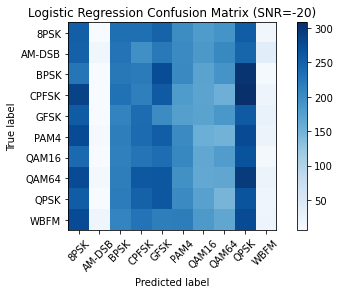

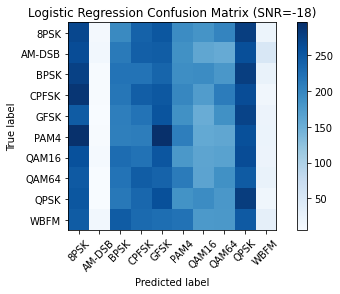

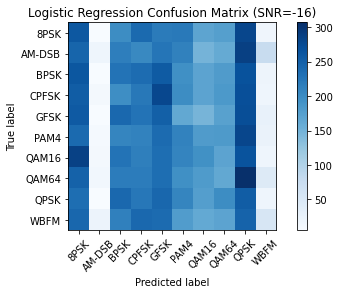

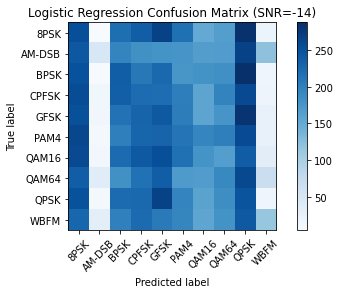

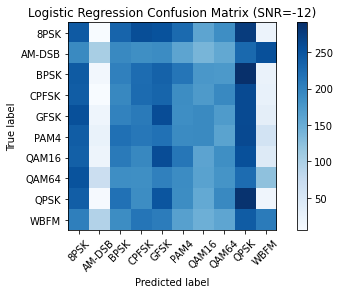

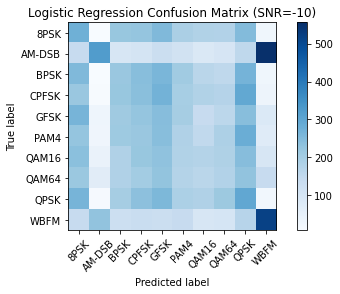

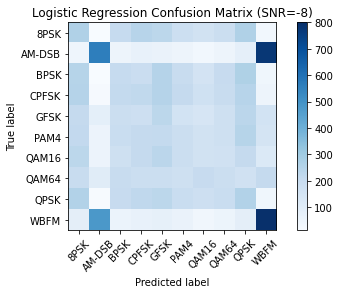

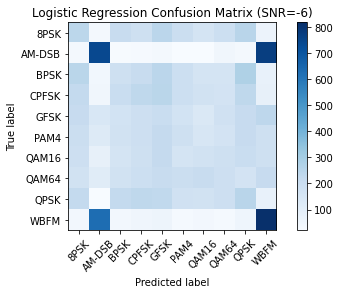

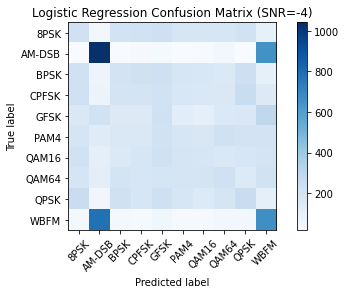

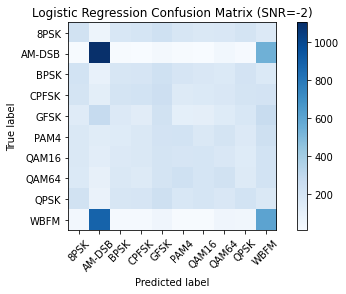

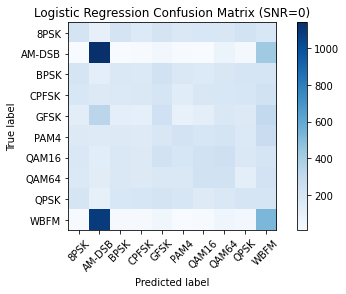

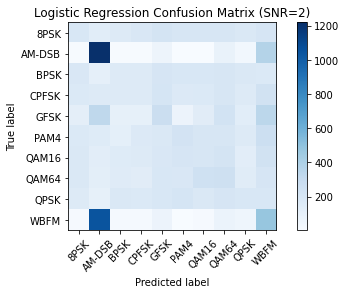

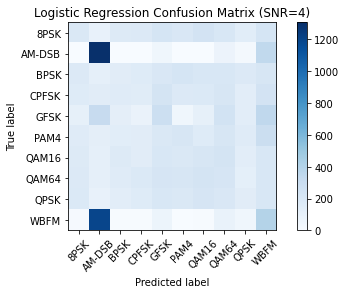

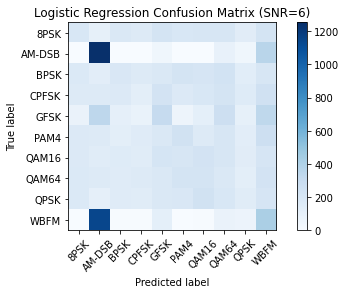

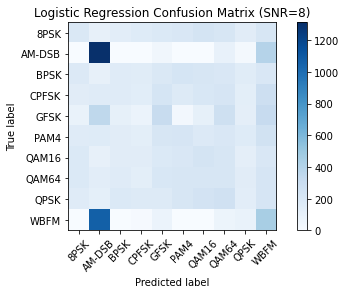

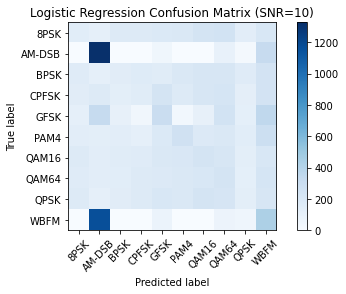

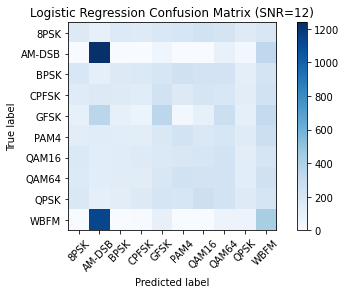

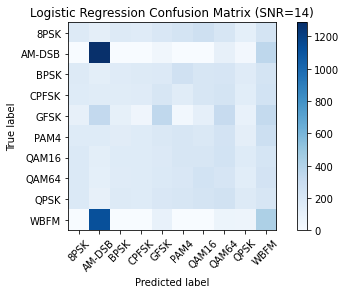

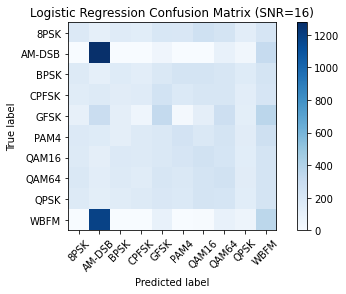

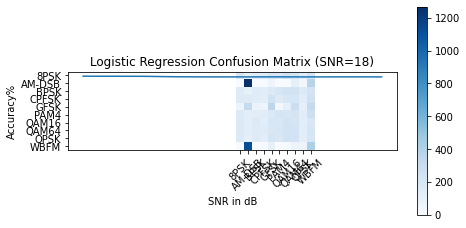

In [12]:
trainX, testX, valX, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr = split_data(X_raw, lbl)
acc = log_reg_classifier(snrs, trainX, testX, valX, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr)
snr_plot(acc, snrs)

# CNN Model

In [ ]:
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
in_shp = [2,128]
# [(W−K+2P)/S]+1
model = models.Sequential()
# input 2 * 128
model.add(Reshape(in_shp+[1], input_shape=in_shp)) # 2 * 128 * 1
model.add(ZeroPadding2D(padding=(31, 0))) # 64* 128 * 1
# 64 * 1 * 3
model.add(Conv2D(3, (1, 128), padding='valid', input_shape=(2, 128,1), activation="relu", kernel_initializer='glorot_uniform'))
model.add(ZeroPadding2D((0, 2)))
# 16 * 2 * 3
model.add(Conv2D(3, (1, 1), strides=4, padding="valid", input_shape=(2, 128, 1), activation="relu", kernel_initializer='glorot_uniform'))
model.add(Flatten())
# Dense 128
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
# Dense 11
model.add(Dense( 10 ,activation='softmax', kernel_initializer='he_normal')) # len(classes)
# output 11
model.add(Reshape([10])) #must change to onehot class
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 64, 128, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 1, 3)          387       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 64, 5, 3)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 2, 3)          12        
_________________________________________________________________
flatten (Flatten)            (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
import random, sys, keras
# print(X_train.shape,Y_train.shape)
# print(X_val.shape,Y_val.shape)
# print(X_test.shape,Y_test.shape)
# Set up some params
nb_epoch = 100     # number of epochs to train on
batch_size = 1024  # training batch size
filepath = 'cnnmodel.h5'
history = model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
    validation_data=(X_val, Y_val),
    callbacks = [
        #params determine when to save weights to file. Happens periodically during fit.
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished. best means lowest loss values for test/validation
model.load_weights(filepath)

Epoch 1/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 2/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 3/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 4/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 5/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 6/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 7/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 8/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 9/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026
Epoch 10/100
780/780 - 3s - loss: 2.3026 - val_loss: 2.3026


In [ ]:
# Show simple version of performance
score = model.evaluate(X_test, Y_test, verbose=0, batch_size=batch_size)
print (score)

2.302600860595703


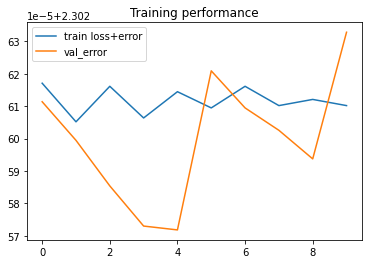

In [ ]:
# Show loss curves
# this is both on training and validation data, hence two curves. They track well.
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

# **Big Picture**

### Plots of the accuracy against the SNR as below

### Report the average overall accuracy as well as the results at SNR=0dB

### Show confusion matrices and find the most confusing classes